**Load Dataset**

In [40]:
# necessary Library imports 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from collections import Counter as c

In [41]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JhAvMzxGA6cncpYdYCfT32Raff7ZE6syQOJmmZEKCIBC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'ckd-donotdelete-pr-hc36cgvumx9zo6'
object_key = 'cleaned_dataset.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Unnamed: 0,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,5.6,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,6.1,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


**Model Building**

In [42]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [43]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

**KNN**

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.9607142857142857
Test Accuracy of KNN is 0.9666666666666667 

Confusion Matrix :- 
[[69  3]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.94      0.98      0.96        48

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



**Decision Tree Classifier**

In [45]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [46]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [2, 3, 4, 6, 8],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [47]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}
1.0


In [48]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9857142857142858
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[70  2]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.96      0.92      0.94        48

    accuracy                           0.95       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



**Random Forest Classifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[72  0]
 [ 0 48]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



**Model Comparison**

In [50]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,1.000000
0,KNN,0.966667
1,Decision Tree Classifier,0.950000


In [51]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

**we find random forest classifier more reliable**

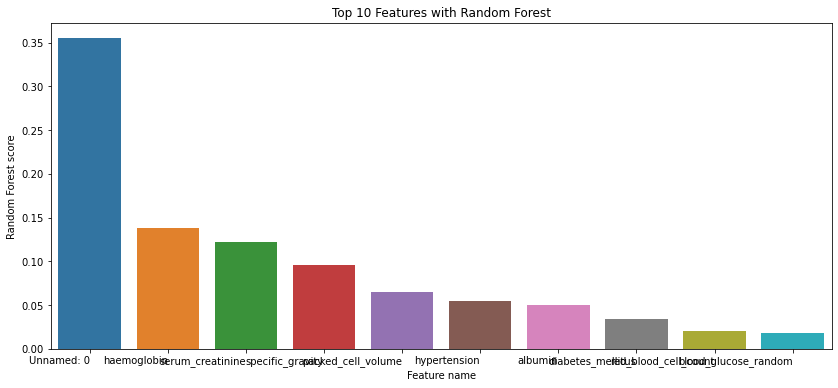

In [52]:
feature_scores=pd.DataFrame(rd_clf.feature_importances_,columns=['Score'],index=X_train.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])

plt.figure(figsize=(14,6))
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Random Forest')
p = plt.xlabel('Feature name')
p = plt.ylabel('Random Forest score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

In [53]:
top10_feature.index

Index(['Unnamed: 0', 'haemoglobin', 'serum_creatinine', 'specific_gravity',
       'packed_cell_volume', 'hypertension', 'albumin', 'diabetes_mellitus',
       'red_blood_cell_count', 'blood_glucose_random'],
      dtype='object')

In [54]:
X.columns

Index(['Unnamed: 0', 'age', 'blood_pressure', 'specific_gravity', 'albumin',
       'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [55]:
for ele in X.columns:
  if ele not in top10_feature.index:
    X = X.drop(ele, axis = 1)

In [56]:
X.head()

,Unnamed: 0,specific_gravity,albumin,blood_glucose_random,serum_creatinine,haemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus
0,0,1.020,1.0,121.0,1.2,15.4,44.0,5.2,1,1
1,1,1.020,4.0,150.0,0.8,11.3,38.0,5.6,0,0
2,2,1.010,2.0,423.0,1.8,9.6,31.0,6.1,0,1
3,3,1.005,4.0,117.0,3.8,11.2,32.0,3.9,1,0
4,4,1.010,2.0,106.0,1.4,11.6,35.0,4.6,0,0


In [57]:
X_train=X_train[['specific_gravity', 'haemoglobin', 'serum_creatinine', 'albumin',
       'packed_cell_volume', 'diabetes_mellitus', 'hypertension',
       'blood_glucose_random', 'red_blood_cell_count', 'blood_urea']]
X_test=X_test[['specific_gravity', 'haemoglobin', 'serum_creatinine', 'albumin',
       'packed_cell_volume', 'diabetes_mellitus', 'hypertension',
       'blood_glucose_random', 'red_blood_cell_count', 'blood_urea']]
rd_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

**Sample Predictions**

In [58]:
# Prediction 1
import warnings
warnings.filterwarnings('ignore')

prediction = rd_clf.predict([[1.025,15.8,1.1,0.0,53.0,0,0,131.0,6.1,18.0]])[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Oops! You have Chronic Kidney Disease.


In [59]:
# Prediction 2
prediction = rd_clf.predict([[1.020,15.4,1.2,1.0,44.0,1,1,121.0,5.2,36.0]])[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Great! You don't have Chronic Kidney Disease.


In [60]:
import pickle
pickle.dump(rd_clf,open("CKD.pkl","wb"))

In [61]:
!pip install ibm_watson_machine_learning

In [62]:
from ibm_watson_machine_learning import APIClient
wml_Credentials={
            "url":"https://us-south.ml.cloud.ibm.com",
            "apikey":"DWS1r8HAf7y11MbetyhfB3tcGYMaIqP4dzBZKNt0zsm1"
}
client=APIClient(wml_Credentials)

In [63]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']['name']==space_name)['metadata']['id'])

In [64]:
space_uid=guid_from_space_name(client,'Model')
print('Space UID='+space_uid)

Space UID=399aba74-a0f8-465e-8c3a-396dbde1407f


In [65]:
client.set.default_space(space_uid)

'SUCCESS'

In [66]:
client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [67]:
#set Python Version
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid  

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [68]:
import sklearn
sklearn.__version__

'1.0.2'

In [69]:
model_name='My_Model'
demo_model=rd_clf
Deployment_Name='My_model'

In [70]:
#Setup Model Meta 
model_props={
    client.repository.ModelMetaNames.NAME:model_name,
    client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}

#model_id=client.repository.get_model_id(model_props)

In [71]:
#SAve Model
model_details=client.repository.store_model(
    model=demo_model,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [72]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'class',
  'schemas': {'input': [{'fields': [{'name': 'specific_gravity',
       'type': 'float64'},
      {'name': 'haemoglobin', 'type': 'float64'},
      {'name': 'serum_creatinine', 'type': 'float64'},
      {'name': 'albumin', 'type': 'float64'},
      {'name': 'packed_cell_volume', 'type': 'float64'},
      {'name': 'diabetes_mellitus', 'type': 'int64'},
      {'name': 'hypertension', 'type': 'int64'},
      {'name': 'blood_glucose_random', 'type': 'float64'},
      {'name': 'red_blood_cell_count', 'type': 'float64'},
      {'name': 'blood_urea', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-19T04:02:16.394Z',
  'id': 'e7e9bcc6-19d9-431a-94b5-5d2a7d2f4a98',
  'modified_at': '2022-11-19T04:02:18.575Z',
  'name': 'My

In [73]:
model_id=client.repository.get_model_id(model_details)
model_id

'e7e9bcc6-19d9-431a-94b5-5d2a7d2f4a98'

In [74]:
#set meta
deployment_props={
    client.deployments.ConfigurationMetaNames.NAME:Deployment_Name,
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [77]:
#Deploy
deployment=client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props)



#######################################################################################

Synchronous deployment creation for uid: 'e7e9bcc6-19d9-431a-94b5-5d2a7d2f4a98' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='85dc54d8-7440-44fa-b9b4-a83469a20b32'
------------------------------------------------------------------------------------------------


